Geo Data Science with Python,
Prof. Susanna Werth, VT Geosciences

---
# Exercise 6: NumPy & Matplotlib


### Content & Grading

You will receive the following points for this exercise:


- **A.1**:  *5 P* - Read the data
- **A.2**:  *5 P* - Basic statistics of the data
- **A.3**: *10 P* - Data manipulation
- **A.4**:  *2 P* - Save the data 
- **A.5**:  *9 P* - Data analysis 
- **A.6**: *15 P* - Visualize & compare
- **A.7**:  *4 P* - Interpretation
- **B**: *10P* - Plot a map

Total: 
- 60 points 
- **up to 15 extra credit points for reasonaby commenting your code** (But don't overcomment. Add as many as needed and as few as possible. Ieally you help me to quickly realize, which code belongs to which task item).

---


### Name and Collaborator
Add your name and the name of any collaborator in the code cell below.

In [24]:
Name = 'Huda'
Collaborators = ['Alex', 'Daniel']

<div class="alert alert-warning">

**Grades:** 

Total points: **59**/60
    
- Part A (40P)
    - A1: 5/5
    - A2: 4/5
    - A3: 10/10
    - A4: 2/2
    - A5: 9/9
    - A6: 15/15
    - A7: 4/4
- Part B (10P)
    - B: 10/10


Signed: Susanna Werth
    
    
</div>


<div class="alert alert-warning">

**Additional Grading Notes:** 

Some more comments might be provided below for answers without full points. If there are no comments, your answer is correct.
        

    


    
    
</div>



---
---
<a id='np'></a>
# A. Temperature Data Analysis (NumPy)

### Overview
This part of the assignment is reflecting usage of NumPy Data arrays, basic data analysis and data manipulations using real data. You are asked to analyze temperature data from Kumpula, Helsinki (in Southern Finland) and Rovaniemi (in northern Finland) and to explore how their summer temperatures have differed in 2017.

**Make sure to regularily comment your code, to receive the extra credit points for that!**


### Data data
The following files are stored in the folder **./data** of the homework repository (**geosf22_material**): 

We will use NOAA weather data. The data has been stored in a CSV file (comma delimited text file) which is stored in the data subdirectory: `6153237444115dat.csv`.

You can read the full description of the data and all the attributes from this file:  `3505doc.txt`.

The first five rows of the data look like following:

In [25]:
# USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
# 028450,99999,201705010000,174,10,14,***,***,*,*,*,2.2,**,**,**,**,67,**,**,**,8,31,31,1009.2,*****,984.1,***,***,*****,*****,*****,*****,35
# 028450,99999,201705010020,180,10,***,4,***,*,*,*,2.9,**,**,**,**,10,**,**,**,*,30,30,******,29.74,******,***,***,*****,*****,*****,*****,**
# 028450,99999,201705010050,190,10,***,4,***,*,*,*,2.1,**,**,**,**,10,**,**,**,*,30,30,******,29.74,******,***,***,*****,*****,*****,*****,**
# 028450,99999,201705010100,188,12,16,***,***,*,*,*,3.2,**,**,**,**,77,**,**,**,*,31,30,1009.1,*****,984.0,***,***,*****,*****,*****,*****,35

**Note**: the data includes `*`-characters that represent no-data values.

For this exercise, you only need to read the following columns:

* **USAF** = the station ID number
    * 028450 : Rovaniemi
    * 029980 : Helsinki Kumpula
* **YR--MODAHRMN** = Year-Month-Day-Hour-Minute in Greenwich Mean Time (GMT)
* **TEMP** = Temperature in Fahrenheit
* **MAX** = Maximum temperature in Fahrenheit
* **MIN** = Minimum temperature in Fahrenheit

... using the `usecols()` parameter in the `genfromtxt()` function in NumPy. Refer to the [NumPy documentation for numpy.genfromtxt()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) to learn how to use this parameter.

---
### A.1: Read the data

In this assignment part your task is to open and explore the NOAA weather data using NumPy. Please answer the given tasks and write your code into the codeblocks below.

1. **Import** the NumPy module **using the acronym `np`**
2. **Read the data** using NumPy into a variable called **`data`** (1 point)
    - Note: We only want the `USAF`, `YR--MODAHRMN`, `TEMP`, `MAX`, and `MIN` columns from the data file
3. **Split the data** into separate variables called `station`, `date`, `temp`, `temp_max`, and `temp_min`


In [26]:
### ADD YOUR CODE - A.1

import numpy as np

fp = '../../../TeachingMaterial/data/6153237444115dat.csv'

data = np.genfromtxt(fp, skip_header=1, delimiter=',', usecols = (0, 2, 21, 26, 27)) 

#getting the file and using the column values we are only importing the necessary columns

station = data[:,0] 
date = data[:,1]
date = date.astype('int64') #date types will be later required to be integar
temp = data[:,2]
temp_max = data[:,3]
temp_min = data[:,4]


---
### A.2: Basic statistics of the data 

Request appropriate numpy attributes that provide answers to the following questions:

1. What are the dimensions of the data? 
2. What is the datatype of the data?


Answer the following questions to explore basic statistics in the data, using the functions `np.nanmean()`, `np.nanstd()` and `np.unique()`. Note that we have to use the `nan` versions of the numpy methods mean, std and unique, to make sure the `NaN` (not a number) values in the dataset are ignored. 

3. What is the mean Fahrenheit temperature in the data (the `temp` variable)? Assign this number to the variable `temp_mean`.
4. What is the standard deviation of the maximum temperature (the `temp_max` variable)? Assign this number to the variable `temp_max_std`.
5. How many unique stations exists in the data (the `station` variable)? Use the numpy method `unique()` and assign this number to the variable `station_count`.


In [27]:
### ADD YOUR CODE to print Answers to the Questions here - A.2

print('A.2.1 the dimesnion of the data: ' + str(data.ndim)) #getting the dimesnion of the data, here it is 2, as it moves along columns and rows,

print(type(data))

temp_mean = np.nanmean(temp) #nanmean, nanstd automatically takes care of the NaN values
print('A.2.3 the mean Fahrenheit temperature in the data: ' + str(round(temp_mean,2)))

temp_max_std = np.nanstd(temp_max)
print('A.2.4 the standard deviation of the maximum temperature in the data: ' + str(round(temp_max_std,2)))

station_count = len(np.unique(station)) 
#first getting the values using 'unique', and then counting how many entries using 'len'
print("A.2.5 number of unique station: " + str(station_count))





A.2.1 the dimesnion of the data: 2
<class 'numpy.ndarray'>
A.2.3 the mean Fahrenheit temperature in the data: 52.25
A.2.4 the standard deviation of the maximum temperature in the data: 10.3
A.2.5 number of unique station: 2


<div class="alert alert-warning">

**Additional Grading Notes:** 
        
Q2: (-1P) data type of numpy array can be read with the function .dtype()

    


    
    
</div>



---
### A.3 Data manipulation: Remove no data values & divide data into subsets

We will keep working with the importat dataset, which should now be saved in the variable `data`, as well as in the individual column variables `station`, `date`, `temp`, `temp_max`, and `temp_min`. Work on the following tasks for data manipulation.

First, completely remove entries with nan-values:

1. Create a new mask variable `tempmask` that is `True` for all finite temperature values, and `False` for `nan` values in the `temp` variable
2. Filter (remove) all rows from the column variables (`station`, `date`, `temp`, `temp_max`, and `temp_min`) using the `tempmask` array and save the new columns in the variables (`station_noNan`, `date_noNan`, `temp_noNan`, `temp_max_noNan`, and `temp_min_noNan`)
 
After that, divide the data into separate subsets for different stations.

3. Select all rows from the data arrays containin no nan-values into variable called `kumpula` where the `station` value is `29980` using an array mask called `kmask`
4. Select all rows from the data arrays containin no nan-values into variable called `rovaniemi` where the `station` value is `28450` using an array mask called `rmask`
  

Hint: the functions `vstack()` and `transpose()` might be useful for this task.

Note: Don't be surprised, if there are still nan-values in the dataset. Keep in mind, that you have (and should have) excluded only nan-values in the temperature column of the dataset.

In [28]:
### ADD YOUR CODE for A.3

#np.isfinite() will return a boolean mask with True wherever the values are neither infinite nor NAN.
tempmask = np.isfinite(temp)
print(tempmask)

# applying the mask over station values so that we will only have those station where temp is finite
# it is also applied for rest of the sub variables 
station_noNan = station[tempmask] 
date_noNan = date[tempmask]
temp_noNan = temp[tempmask]
temp_max_noNan = temp_max[tempmask]
temp_min_noNan = temp_min[tempmask]

# np.vstack -> with the individual variables, we are making a new dataset
data_noNan = np.vstack((station_noNan, date_noNan, temp_noNan, temp_max_noNan, temp_min_noNan)) 


kmask = (station_noNan == 29980)
rmask = (station_noNan == 28450)

data_noNan = np.transpose(data_noNan)
print(data_noNan)

kumpula = data_noNan[kmask] ## kumpula = data_noNan[data_noNan[:,0] == 29980], an alternative way to do this
rovaniemi = data_noNan[rmask]

[ True  True  True ...  True  True  True]
[[2.84500000e+04 2.01705010e+11 3.10000000e+01            nan
             nan]
 [2.84500000e+04 2.01705010e+11 3.00000000e+01            nan
             nan]
 [2.84500000e+04 2.01705010e+11 3.00000000e+01            nan
             nan]
 ...
 [2.99800000e+04 2.01708312e+11 6.40000000e+01            nan
             nan]
 [2.99800000e+04 2.01708312e+11 6.40000000e+01            nan
             nan]
 [2.99800000e+04 2.01708312e+11 6.40000000e+01            nan
             nan]]


In [29]:
# Check if your subset variables contain what they should
# (you don't need to modify this cell)

print("Kumpula: \n", kumpula[:5,:], "\n")
print("Rovaniemi: \n", rovaniemi[:5,:], "\n")


Kumpula: 
 [[2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.7000000e+01           nan           nan]
 [2.9980000e+04 2.0170501e+11 3.9000000e+01           nan           nan]] 

Rovaniemi: 
 [[2.8450000e+04 2.0170501e+11 3.1000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.0000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.0000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.1000000e+01           nan           nan]
 [2.8450000e+04 2.0170501e+11 3.0000000e+01           nan           nan]] 



---
### A.4 Save the data into a csv-file

Now save the data for each station into a csv-file `data_kumpula.csv` and `data_rovaniemi.csv`, using the savetext() function in the code cell below. 


In [37]:
### ADD YOUR CODE for A.4

np.savetxt('data_kumpula.csv', kumpula, delimiter=',')
np.savetxt('data_rovaniemi.csv', rovaniemi, delimiter=',')


---
### A.5 Data analysis 

In this problem the aim is to understand the differences between temperatures in Helsinki Kumpula and Rovaniemi. The data are now stored in your variables `kumpula` and `rovaniemi`. Remember to comment your code.


1. What was the median temperature during the observed period in:
    - Kumpula? (store the answer in a variable `kumpula_median`
    - Rovaniemi? (store the answer in a variable `rovaniemi_median`

2. The median temperatures above consider data from quite a long period of time (May-Aug), hence the differences might not be so clear. Hence, **find out what the mean temperatures in May and June in Kumpula and Rovaniemi were:**
    - Select from `rovaniemi` and `kumpula` arrays the rows where values of the `date` column are from May 2017 and assign them into mask variables `rovaniemi_may` and `kumpula_may`
    - Repeat the procedure for the month of June and assign those values into mask variables `rovaniemi_june` and `kumpula_june`

3. Print the mean, min and max temperatures for both locations in May and June using the new masks (`rovaniemi_may`,`kumpula_may`,`rovaniemi_june` and `kumpula_june`).

In [38]:
### ADD YOUR CODE for A.5

#np.median will go through the column and find the median value
kumpula_median = np.median(kumpula[:,2])
print("Kumpula median temp in the month of May & June: " + str(kumpula_median))
rovaniemi_median = np.median(rovaniemi[:,2])
print("Rovaniemi median temp in the month of May & June: " + str(rovaniemi_median))

#masking for entries that are from May
rovaniemi_may = ((rovaniemi[:,1] >= 201705010000) & (rovaniemi[:,1] < 201706010000))  
kumpula_may = ((kumpula[:,1] >= 201705010000) & (kumpula[:,1] < 201706010000))

#masking for entries that are from June 
rovaniemi_june = ((rovaniemi[:,1] >= 201706010000) & (rovaniemi[:,1] < 201707010000))
kumpula_june = ((kumpula[:,1] >= 201706010000) & (kumpula[:,1] < 201707010000))


#applying the 'May' & 'June' filters created above and using mean/min/max functions on the 3rd column of that data
rovaniemi_may_meantemp = print("Rovaniemi mean temp in May: " + str(round(np.mean(rovaniemi[:,2][rovaniemi_may]),2)))
kumpula_may_meantemp = print("Kumpula mean temp in May: " + str(round(np.mean(kumpula[:,2][kumpula_may]),2)))
rovaniemi_june_meantemp = print("Rovaniemi mean temp in June: " + str(round(np.mean(rovaniemi[:,2][rovaniemi_june]),2)))
kumpula_june_meantemp = print("Kumpula mean temp in June: " + str(round(np.mean(kumpula[:,2][kumpula_june]),2)))

rovaniemi_may_mintemp = print("Rovaniemi min temp in May: " + str(np.min(rovaniemi[:,2][rovaniemi_may])))
kumpula_may_mintemp = print("Kumpula min temp in May: " + str(np.min(kumpula[:,2][kumpula_may])))
rovaniemi_june_mintemp = print("Rovaniemi min temp in June: " + str(np.min(rovaniemi[:,2][rovaniemi_june])))
kumpula_june_mintemp = print("Kumpula min temp in June: " + str(np.min(kumpula[:,2][kumpula_june])))

rovaniemi_may_maxtemp = print("Rovaniemi max temp in May: " + str(np.max(rovaniemi[:,2][rovaniemi_may])))
kumpula_may_maxtemp = print("Kumpula max temp in May: " + str(np.max(kumpula[:,2][kumpula_may])))
rovaniemi_june_maxtemp = print("Rovaniemi max temp in June: " + str(np.max(rovaniemi[:,2][rovaniemi_june])))
kumpula_june_maxtemp = print("Kumpula max temp in June: " + str(np.max(kumpula[:,2][kumpula_june])))


#instead of accessing the columns every time, temp can be kept in variable and will be used later for next parts
rovaniemi_may_temp = rovaniemi[:,2][rovaniemi_may]
kumpula_may_temp = kumpula[:,2][kumpula_may]

#full data for Kumpula & Rovaniemi in May

rovaniemi_may_data = rovaniemi[rovaniemi_may]
kumpula_may_data = kumpula[kumpula_may]


Kumpula median temp in the month of May & June: 58.0
Rovaniemi median temp in the month of May & June: 52.0
Rovaniemi mean temp in May: 37.39
Kumpula mean temp in May: 49.56
Rovaniemi mean temp in June: 51.83
Kumpula mean temp in June: 56.74
Rovaniemi min temp in May: 19.0
Kumpula min temp in May: 28.0
Rovaniemi min temp in June: 30.0
Kumpula min temp in June: 37.0
Rovaniemi max temp in May: 59.0
Kumpula max temp in May: 73.0
Rovaniemi max temp in June: 74.0
Kumpula max temp in June: 75.0


---
### A.6 Visualize & compare time series from *Kumpula* and *Rovaniemi*

In the previous part of this assignment you have extracted the hourly temperature measurements during the month of May, 2017 for the two locations *Kumpula* and *Rovaniemi*. These should be stored in the numpy arrays `kumpula` and `rovaniemi`. Now plot these time series to compare them.

Create a plot with matplotlib.pyplot and format it the following way:

1. Use a dashed line format and add circle markers for the data points.
2. Plot the *Kumpula* graph in red, and *Rovaniemi* in blue.
3. Include a title `"Kumpula & Rovaniemi Temperatures in May 2017"`.
4. Add an X-label `"Time"`.
5. Add a Y-label `"Temperature [°F]"`.
6. Mark the highest peak in one of the two time series by adding text to the graph: `'High temperature in May 2017 (location)'`
7. Add date labels to the x axis in datetime format `'%Y%m%d%H%M'`. <br> Hint: use the `plt.subplots()` function this time, without creating rows or colums of subplots.
8. Add a legend for the two colored graphs to the plot. 
9. Add a grid to the background.
10. Save the figure in a .png image file.


In [32]:
# Import
from datetime import datetime

#bringing the date into new variables
k_may_str = kumpula_may_data[:,1]
r_may_str = rovaniemi_may_data[:,1]

#for loop to get string value for months
k_may_date = []
r_may_date = []
for m in k_may_str:
    k_may_date.append(str(int(m)))
for m in r_may_str:
    r_may_date.append(str(int(m)))


def convert(date):
    return datetime.strptime(str(date), '%Y%m%d%H%M')

# date = date[~np.isnan(date)]

#convert to datetime
k_may_dt = [convert(date) for date in k_may_date]
k_may_dt = np.array(k_may_dt)
r_may_dt = [convert(date) for date in r_may_date]
r_may_dt = np.array(r_may_dt)

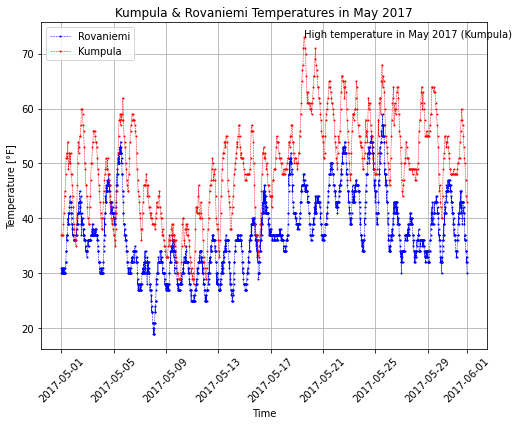

In [33]:
### ADD YOUR CODE - A.6

import matplotlib.pyplot as plt

#plotting the data
plt.plot(r_may_dt,  rovaniemi_may_temp, 'bo--', linewidth=0.5, markersize=1, label="Rovaniemi")
plt.plot(k_may_dt,  kumpula_may_temp, 'ro--',   linewidth=0.5, markersize=1,  label="Kumpula")

plt.title('Kumpula & Rovaniemi Temperatures in May 2017')
plt.xlabel('Time')
plt.ylabel('Temperature [°F]')
plt.legend(loc="upper left")
#finding the highest point and adding a text there
plt.text(k_may_dt[kumpula_may_temp.argmax()], np.max(kumpula_may_temp), 'High temperature in May 2017 (Kumpula)')
plt.grid()
plt.xticks(rotation=45)
plt.savefig('./kumpula_rovaniemi_may_temp.png',dpi=300, bbox_inches = "tight")
plt.show()
plt.rcParams['figure.figsize'] = [8, 6] # to ensure the figure size

---
### Task A.7: Interpretation

Let's briefly interpret the results of this data analysis. Justify your answers to the following questions based on the data analysis results from this exercise (edit the markdown cell below to add your answers):

1. Did you find large temperatures differences between the months?
2. Is Rovaniemi a much colder place than Kumpula?

### --- 1. 

There have been noticable difference in temperatures between two observed months. More than 13 degree celsius rise in temp was observed in Rovaniemi and around 7 degee celsius rise in Kumpula between these months.


### --- 2. 

By all statistics, such as mean, min, and max, it can be suggested that Kumpula is warmer than Rovaniemi. Mean tempterature in May is 12 degree lower in Rovaniemi. 


---
<a id='mpl'></a>
# B. Plot a Map with Matplotlib


### Overview
Plot the subset/slice of a gridded dataset with adjusted axes labels.

### Data
The following file is stored in the folder **./data** of the homework repository (**geosf22_material**): 

The file `'US_MSR_lowRes_terrain.dat'` contains a georeferenced shaded relief map of the USA.

In the code cell below, your are already provided with code to import this dataset from the file into the variable `reliefUS`. It already stores metadata from the file header, and `x` and `y` coordinates of the shaded relief in form of a meshgrid.

### Task
In the code cell below, you are also given coordinate bounds for a smaller area in the Northeast (NE) of the United States, stored in the variables `latMin`, `latMax`, `lonMin` and `lonMax`. Your task is to slice data for this bounding box out of the shaded relief data set. Then, plot the sliced out data frame in a matplotlib image with correctly labeled coordinate axes. In addition, plot the location of the city of New York and two further cities of your choice into the map. For that you need to:

* Find correct indices for the bounding box coordinates in the coordinate arrays `x_col` and `y_col`. (2 points)
* Slice all relevant arrays to the bounding box using those indices. (2 points)
* Plot relief data correctly labeled axes, the x and y coordinates. (2 points)
* Plot the relief with a reversed gray scale colorbar. (1 point)
* Plot the location of the city New York, with the coordinates `NY_lat` and `NY_lon` using a colored dot marker. (1 point)
* Label the dot marker for the city of New York with its name. (1 point)
* Find coordinates of two more cities in the map frame and add colored dots for their locations. (1 point)


In [39]:
import numpy as np

# reading the file using numpy function genfromtxt, skipping header
filename = "../../../TeachingMaterial/data/US_MSR_lowRes_terrain.dat"  # USA Shaded relief data
reliefUS = np.genfromtxt(filename, delimiter=' ', skip_header=6) 

# bounding box information from file header
xllcorner = -129.9727818920000004
yllcorner =  15.5224817269999988
cellsize  =   0.04001
[yDim,xDim] = reliefUS.shape

# Creating meshgrids x and y that hold lon and lat coordinates for each data point
x_col = np.empty(reliefUS.shape)
y_col = np.empty(reliefUS.shape)
x_col = np.linspace(xllcorner,xllcorner+cellsize*(xDim+1), xDim)
y_col = np.linspace(yllcorner,yllcorner+cellsize*(yDim+1), yDim)
y_col = np.flip(y_col)
x, y = np.meshgrid(x_col,y_col)

# defining a new bounding box for NE USA to be extracted from the shaded relief image
latMin = 36
latMax = 50
lonMin = -98
lonMax = -65

# coordinates New York
NY_lat = 40.730610
NY_lon = -73.935242

# coordinates Atlantic City
AC_lat = 39.367714
AC_lon = -74.424156

79364368, 88980584

# coordinates Philadelphia
PH_lat = 39.953479
PH_lon = -75.160608

In [40]:
# setting the slicer is tricky and important as a wrong slicer might select two point location so 
# cellsize has been divided by two and range has been built
# eg: lat 48.98 came from latMax - cellsize/2

lat_max_sliced_index = np.where((y_col > 49.98) & (y_col < 50.02))
lat_min_sliced_index = np.where((y_col > 35.98) & (y_col < 36.02))

lon_max_sliced_index = np.where((x_col > -65.02) & (x_col < -64.98))
lon_min_sliced_index = np.where((x_col > -98.02) & (x_col < -97.98))

print(lat_max_sliced_index, lat_min_sliced_index, lon_max_sliced_index, lon_min_sliced_index)


#slicing the data using indices obtained from above
sliced_x_col = x_col[lon_min_sliced_index[0][0]:lon_max_sliced_index[0][0]]
sliced_y_col = y_col[lat_max_sliced_index[0][0]:lat_min_sliced_index[0][0]]

# This part has been manually done, but can be automated as well
# using the values obtained by previous part, x_col, y_col has been sliced 
sliced_reliefUS = reliefUS[151:500,798:1622]
sliced_x, sliced_y = np.meshgrid(sliced_x_col, sliced_y_col)

print(str(lat_max_sliced_index[0][0]))

(array([151]),) (array([500]),) (array([1622]),) (array([798]),)
151


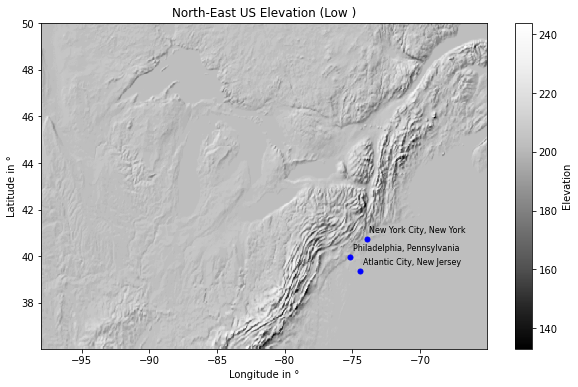

In [41]:
# plot data into map
fig = plt.figure(figsize=(10, 6))

# plotting the map
plt.pcolormesh(sliced_x,sliced_y, sliced_reliefUS, shading='auto',cmap='Greys_r') 

#plotting the cities
plt.plot(NY_lon, NY_lat, 'bo', markersize=5)
NYC = plt.text(NY_lon+.2, NY_lat+.3, 'New York City, New York', fontsize=8)

plt.plot(AC_lon, AC_lat, 'bo', markersize=5)
AC = plt.text(AC_lon+.2, AC_lat+.3, 'Atlantic City, New Jersey', fontsize=8)

plt.plot(PH_lon, PH_lat, 'bo', markersize=5)
PH = plt.text(PH_lon+.2, PH_lat+.3, 'Philadelphia, Pennsylvania', fontsize=8)


# adding a colorbar, axis labels and title
plt.xlabel('Longitude in °')
plt.ylabel('Latitude in °')
plt.title('North-East US Elevation (Low )')
plt.colorbar(label=('Elevation'))
plt.show()